# Run a generic PyMT model

Import the `Sedflux3D` component from `pymt`. All of the components available to `pymt` are located in `pymt.components`. Here I've renamed the component to be `Model` to show that you could run these same commands with other models as well. For instance, you could instead import `Child` with `from pymt.components import Child as Model` and repeat this exercise with Child instead.

In [1]:
# Some magic to make plots appear within the notebook
%matplotlib inline
import numpy as np # In case we need to use numpy

In [2]:
from pymt.components import Sedflux3D as Model

/Users/huttone/git/mcflugen/pymt-demo/conda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


Instantiate the model. If you wanted, you could have multiple instances of the same model - each with their own state. A PyMT component is instantiate without any arguments.

In [3]:
model = Model()

PyMT adds a docstring to the model. It is important to us that credit it given where credit is due. We want to make it clear that when we include a component in our framework the component is not ours but belong to the model's author. To that end, the model documentation includes a list of model authors, DOIs, as well as full citations to use if someone uses the model. In addition, to keep models from being black boxes, and because they are all open source, we provide links to source code. 

In [4]:
help(model)

Help on Sedflux3D in module pymt.framework.bmi_bridge object:

class Sedflux3D(BmiCap)
 |  Basic Model Interface for Sedflux3D.
 |  
 |  Sedflux3D is a basin filling stratigraphic model. Sedflux3d simulates
 |  long-term marine sediment transport and accumulation into a three-
 |  dimensional basin over time scales of tens of thousands of years. It
 |  simulates the dynamics of strata formation of continental margins
 |  based on distribution of river plumes and tectonics.
 |  
 |  Author:
 |  - Eric Hutton
 |  Version: 2.1
 |  License: MIT
 |  DOI: 10.1594/IEDA/100161
 |  URL: http://csdms.colorado.edu/wiki/Model_help:Sedflux
 |  
 |  Cite as:
 |  
 |      @article{hutton2008sedflux,
 |      title={Sedflux 2.0: An advanced process-response model that generates three-dimensional stratigraphy},
 |      author={Hutton, Eric WH and Syvitski, James PM},
 |      journal={Computers \& Geosciences},
 |      volume={34},
 |      number={10},
 |      pages={1319--1337},
 |      year={2008},
 | 

In [5]:
rm -rf _model # Clean up for the next step

The following code is generic for all `pymt` components - not just `Sedflux3D`. First we instantiate the component and then call its `setup` method to create a model simulation with the necessary input files (note that this is ***not*** a BMI method but something added by PyMT). `setup` takes an optional argument that gives a path to a folder that will contain the necessary input files (if not provided, a temporary folder will be used). `setup` returns the name of the config file and the path to the folder containing it (we'll use this information later when we run `initialize`).

In [6]:
config_file, initdir = model.setup('_model')

If we look inside the `_model` folder, we can see all of the necessary sedflux input files ready to run.

In [7]:
ls _model

sedflux_3d_bathy.csv      sedflux_3d_process.kvf    sedflux_3d_sea_level.csv
sedflux_3d_init.kvf       sedflux_3d_river.kvf      sedflux_3d_sediment.kvf


The `initialize` method reads all of the input files and gets the model ready to update through time.

In [8]:
model.initialize(config_file, dir=initdir)

Here we update the model for 10 time steps, printing the model time after each step.

In [9]:
for t in range(10):
    model.update()
    print model.get_current_time()

365.0
730.000000001
1095.0
1460.0
1825.00000001
2190.00000001
2555.00000001
2920.00000001
3285.00000002
3650.00000002


From the output it appears that sedflux is operating on a 1 year time step and is using units of *days*. We can double check that assumption.

In [10]:
model.time_units

'd'

Yep, *days*. And the time step...

In [11]:
model.get_time_step()

365.0

The `update_until` method gives us more control by allowing us to update to a particular time. Using the `units` keyword allows us to specify the "until" time. Here we update the model until 20 years.

In [12]:
model.update_until(20., units='year')
model.get_current_time()

7304.843975632304

In [13]:
model.time_units = 'year'
print model.get_current_time()

20.0


We've covered how to setup and run a model, now we'll have a look at how to get data out of the model. This is done with the `get_value` method but first we need to look at what variables the model provides. This is held as a tuple of variable names and accessed through the `output_var_names` attribute.

In [14]:
model.output_var_names

('land-or-seabed_sediment_grain__mean_diameter',
 'sea_water__depth',
 'sea_bottom_sediment__bulk_mass-per-volume_density',
 'sea_bottom_surface__elevation',
 'sea_bottom_sediment_grain__mean_diameter',
 'bedrock_surface__elevation',
 'land-or-seabed_sediment__permeability',
 'sediment_grain__mean_diameter',
 'land-or-seabed_sediment_surface__y_derivative_of_elevation',
 'sea_bottom_sediment__porosity',
 'land-or-seabed_sediment_silt__volume_fraction',
 'land-or-seabed_sediment_surface__elevation',
 'land-or-seabed_sediment_clay__volume_fraction',
 'sea_bottom_sediment_mud__volume_fraction',
 'land-or-seabed_sediment_sand__volume_fraction',
 'land-or-seabed_sediment__mean_of_deposition_age',
 'sediment__mean_of_deposition_age',
 'sea_bottom_surface__y_derivative_of_elevation',
 'sea_bottom_sediment_clay__volume_fraction',
 'land-or-seabed_sediment__porosity',
 'land-or-seabed_sediment__bulk_mass-per-volume_density',
 'land-or-seabed_sediment_mud__volume_fraction',
 'land-or-seabed_sedi

So to get the values of, say, water depth,

In [15]:
model.get_value('sea_water__depth')

array([ 50.,  50.,  50., ..., -30., -30., -30.])

As with previous methods, you can use the `units` keyword to specify units. Here we get water depths in units of parsecs.

In [16]:
model.get_value('sea_water__depth', units='parsec')

array([  1.62038942e-15,   1.62038942e-15,   1.62038942e-15, ...,
        -9.72233655e-16,  -9.72233655e-16,  -9.72233655e-16])

# Run CHILD in PyMT

We'll now do the same thing but this time with the Child model. Notice that the commands will be the same. *If you know how to run one PyMT component, you know how to run them all.*

In [17]:
from pymt.components import Child as Model
model = Model()

You can now see the help information for Child. This time, have a look under the *Parameters* section (you may have to scroll down - it's the section after the citations). The *Parameters* section describes optional keywords that you can pass the the `setup` method. In the previous example we just used defaults. Below we'll see how to set input file parameters programmatically through keywords.

In [18]:
help(model)

Help on Child in module pymt.framework.bmi_bridge object:

class Child(BmiCap)
 |  Basic Model Interface for Child.
 |  
 |  CHILD computes the time evolution of a topographic surface z(x,y,t) by
 |  fluvial and hillslope erosion and sediment transport.
 |  
 |  Author:
 |  - Greg Tucker
 |  - Stephen Lancaster
 |  - Nicole Gasparini
 |  - Rafael Bras
 |  - Scott Rybarczyk
 |  Version: 10.6
 |  License: GPLv2
 |  DOI: 10.1594/IEDA/100102
 |  URL: http://csdms.colorado.edu/wiki/Model:CHILD
 |  
 |  Cite as:
 |  
 |      @article{tucker2010child,
 |        title={CHILD Users Guide for version R9. 4.1},
 |        author={Tucker, Gregory E},
 |        journal={Cooperative Institute for Research in Environmental Sciences (CIRES) and Department of Geological Sciences, University of Colorado, Boulder, USA},
 |        year={2010}
 |      }
 |  
 |      @article{tucker2001object,
 |        title={An object-oriented framework for distributed hydrologic and geomorphic modeling using triangulated 

In [19]:
rm -rf _model # Clean up for the next step

We can change input file paramters through `setup` keywords. The `help` description above gives a brief description of each of these. For this example we'll change the grid spacing, the size of the domain, and the duration of the simulation.

In [20]:
config_file, initdir = model.setup('_model',
                                   grid_node_spacing=750.,
                                   grid_x_size=20000.,
                                   grid_y_size=40000.,
                                   run_duration=1e6)

The setup folder now only contains the child input file.

In [21]:
ls _model

child.in


Again, initialize and run the model for 10 time steps.

In [22]:
model.initialize(config_file, initdir)

In [23]:
for t in range(10):
    model.update()
    print model.get_current_time()

10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
100.0


This time around it's now quite as clear what the units of time are. We can check in the same way as before.

In [24]:
model.time_units

'year'

Update until some time in the future. Notice that, in this case, we update to a partial time step. Child is fine with this however some other models may not be. For models that can not update to times that are not full time steps, PyMT will advance to the next time step and interpolate values to the requested time.

In [25]:
model.update_until(201.5, units='year')
print model.get_current_time()

201.5


Child offers different output variables but we get them in the same way as before.

In [26]:
model.output_var_names

('land_surface__elevation',
 'sea_bottom_surface__elevation',
 'land_surface__elevation_increment',
 'sediment__erosion_rate',
 'channel_water__discharge',
 'channel_water_sediment~bedload__mass_flow_rate')

In [27]:
model.get_value('land_surface__elevation')

array([ 0.        ,  0.        ,  0.        , ..., -0.14213881,
       -0.34210564,  0.00178402])

We can query each input and output variable. PyMT attaches a dictionary to each component called `var` that provides information about each variable. For instance we can see that `"land_surface__elevation"` has units of meters, is an input and output variable, and is defined on the nodes of grid with id 0.

In [28]:
model.var['land_surface__elevation']

<DataValues>
double land_surface__elevation(n_nodes)
Attributes:
    units: m
    grid: 0
    intent: inout
    location: node

If we plot this variable, we can visually see the unsructured triangular grid that Child has decomposed its grid into.

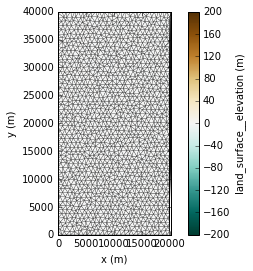

In [29]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

As with the `var` attribute, PyMT adds a dictionary, called `grid`, to components that provides a description of each of the model's grids. Here we can see how the x and y positions of each grid node, and how nodes connect to one another to form faces (the triangles in this case). Grids are described using the ugrid conventions.

In [30]:
model.grid[0]

<xarray.Dataset>
Dimensions:                 (n_faces: 2914, n_node: 1512, n_vertices: 8742)
Dimensions without coordinates: n_faces, n_node, n_vertices
Data variables:
    mesh                    int64 0
    node_y                  (n_node) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    node_x                  (n_node) float64 750.0 1.5e+03 2.25e+03 3e+03 ...
    face_node_connectivity  (n_vertices) int32 211 106 107 210 107 108 109 ...
    face_node_offset        (n_faces) int32 3 6 9 12 15 18 21 24 27 30 33 36 ...

Child initializes it's elevations with random noise centered around 0. We would like instead to give it elevations that have some land and some sea. First we'll get the x and y coordinates for each node along with their elevations.

In [31]:
x, y = model.get_grid_x(0), model.get_grid_y(0)
z = model.get_value('land_surface__elevation')

All nodes above `y=y_shore` will be land, and all nodes below `y=y_shore` will be sea.

In [32]:
y_shore = 15000.
z[y < y_shore] -= 100
z[y >= y_shore] += 100

In [33]:
model.set_value('land_surface__elevation', z)

Just to verify we set things up correctly, we'll create a plot.

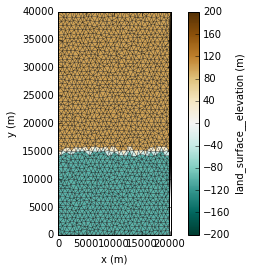

In [34]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

To get things going, we'll run the model for 5000 years and see what things look like.

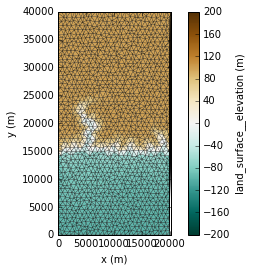

In [35]:
model.update_until(5000.)
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

We'll have some fun now by adding a simple uplift component. We'll run the component for another 5000 years but this time uplifting a corner of the grid by `dz_dt`.

In [36]:
dz_dt = .02
now = model.get_current_time()
times, dt = np.linspace(now, now + 5000., 50, retstep=True)
for time in times:
    model.update_until(time)
    z = model.get_value('land_surface__elevation')
    z[(y > 15000.) & (x > 10000.)] += dz_dt * dt
    model.set_value('land_surface__elevation', z)

A portion of the grid was uplifted and channels have begun eroding into it.

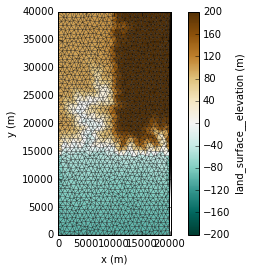

In [37]:
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

We now stop the uplift and run it for an additional 5000 years.

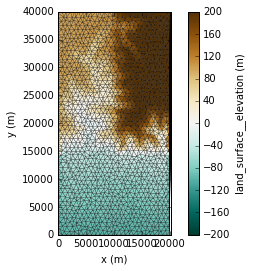

In [38]:
model.update_until(model.get_current_time() + 5000.)
model.quick_plot('land_surface__elevation', edgecolors='k', vmin=-200, vmax=200, cmap='BrBG_r')

In [39]:
model.get_value('channel_water_sediment~bedload__mass_flow_rate')

array([  3.03531373e+09,   1.33561968e+10,   5.64027942e+09, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

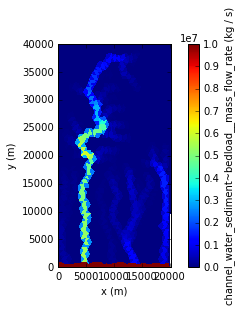

In [47]:
model.quick_plot('channel_water_sediment~bedload__mass_flow_rate', vmax=1.e7)

In [46]:
1e6 * 2650. / (365 * 24 * 60 * 60)

84.03094875697616